# Dancer's business - 2. EDA and Feature engineering
In this notebook session, we will
- check data quality and impute missing data,
- feature construction (employment volume),
- EDA to see trend of features that might affect revenue.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/dance1.csv')

In [3]:
# Area to look
area_all = ['LA','SanFran','Seattle','NY','Chicago','All'] # All: U.S.

# Empty data
In the last notebook session, we saw there are missing data, mostly for dancer industry jobs. Let's check them for features that we are interested.

In [4]:
# Any missing entry (year, area, job)
print('Total records:',len(df))
missing_record=0

for i in range(2006,2022):
    for j in df.area.unique():
        if df.loc[(df.area==j)&(df.year==i)].occ.nunique()!=5:
            missing_set = set(df.occ.unique()) \
                            - set(df.loc[(df.area==j)&(df.year==i)].occ.unique())
            missing_record+=len(missing_set)
            
            print(i,j, missing_set) 
print('Total',missing_record,'missing records')

Total records: 586
2006 NY {'dancer'}
2009 Seattle {'choreo'}
2010 Seattle {'dancer'}
2011 Seattle {'choreo', 'dancer'}
2012 Seattle {'choreo', 'dancer'}
2013 Seattle {'dancer'}
2014 Seattle {'dancer'}
2015 Seattle {'dancer'}
2016 Seattle {'dancer'}
2018 Seattle {'choreo'}
2019 NY {'choreo'}
2019 Seattle {'choreo'}
2019 SanFran {'choreo'}
2020 NY {'choreo'}
2020 Chicago {'choreo'}
2020 Seattle {'choreo'}
2020 SanFran {'choreo'}
2021 Chicago {'choreo', 'dancer'}
2021 Seattle {'dancer'}
Total 22 missing records


Some missing records of dancer's income data in multiple cities and years. 
Of course, dancers are hard to track!
Let's not bother to handle the missing data here for now.
If dancer's statistics are irregular over year, we can't impute its empty record anyway.

In [5]:
# Wage statistics
print('Missing data: Annual wage --------\n')

print('Dancer\n', df[df.occ=='dancer'].a_mean.isna().value_counts(),'\n')
print('Choreographer\n', df[df.occ=='choreo'].a_mean.isna().value_counts(),'\n')
print('Fitness Trainer\n', df[df.occ=='fit_trainer'].a_mean.isna().value_counts(),'\n')
print('Recreational Worke\n', df[df.occ=='rec_worker'].a_mean.isna().value_counts(),'\n')

print('Missing data: Hourly wage --------\n')

print('Dancer\n', df[df.occ=='dancer'].h_mean.isna().value_counts(),'\n')
print('Choreographer\n', df[df.occ=='choreo'].h_mean.isna().value_counts(),'\n')
print('Fitness Trainer\n', df[df.occ=='fit_trainer'].h_mean.isna().value_counts(),'\n')
print('Recreational Worke\n', df[df.occ=='rec_worker'].h_mean.isna().value_counts(),'\n')

# Employee statistics
print('Missing data: Number of employee --------\n')

print('Dancer\n', df[df.occ=='dancer'].tot_emp.isna().value_counts(),'\n')
print('Choreographer\n', df[df.occ=='choreo'].tot_emp.isna().value_counts(),'\n')
print('Fitness Trainer\n', df[df.occ=='fit_trainer'].tot_emp.isna().value_counts(),'\n')
print('Recreational Worke\n', df[df.occ=='rec_worker'].tot_emp.isna().value_counts(),'\n')

Missing data: Annual wage --------

Dancer
 True     92
False     1
Name: a_mean, dtype: int64 

Choreographer
 False    89
True      3
Name: a_mean, dtype: int64 

Fitness Trainer
 False    104
Name: a_mean, dtype: int64 

Recreational Worke
 False    104
Name: a_mean, dtype: int64 

Missing data: Hourly wage --------

Dancer
 False    90
True      3
Name: h_mean, dtype: int64 

Choreographer
 False    89
True      3
Name: h_mean, dtype: int64 

Fitness Trainer
 False    104
Name: h_mean, dtype: int64 

Recreational Worke
 False    104
Name: h_mean, dtype: int64 

Missing data: Number of employee --------

Dancer
 False    85
True      8
Name: tot_emp, dtype: int64 

Choreographer
 False    71
True     21
Name: tot_emp, dtype: int64 

Fitness Trainer
 False    100
True       4
Name: tot_emp, dtype: int64 

Recreational Worke
 False    102
True       2
Name: tot_emp, dtype: int64 



In [6]:
# Statistical uncertainties
print('Uncertainties: Number of employee --------\n')

print('Dancer\n', df[df.occ=='dancer'].emp_prse.mean(),'\n')
print('Choreographer\n', df[df.occ=='choreo'].emp_prse.mean(),'\n')
print('Fitness Trainer\n', df[df.occ=='fit_trainer'].emp_prse.mean(),'\n')
print('Recreational Worke\n', df[df.occ=='rec_worker'].emp_prse.mean(),'\n')

print('Uncertainties: Wage --------\n')

print('Dancer\n', df[df.occ=='dancer'].mean_prse.mean(),'\n')
print('Choreographer\n', df[df.occ=='choreo'].mean_prse.mean(),'\n')
print('Fitness Trainer\n', df[df.occ=='fit_trainer'].mean_prse.mean(),'\n')
print('Recreational Worke\n', df[df.occ=='rec_worker'].mean_prse.mean(),'\n')

Uncertainties: Number of employee --------

Dancer
 25.00588235294118 

Choreographer
 26.884507042253507 

Fitness Trainer
 7.455 

Recreational Worke
 6.072549019607846 

Uncertainties: Wage --------

Dancer
 8.825555555555557 

Choreographer
 9.514606741573036 

Fitness Trainer
 3.6144230769230767 

Recreational Worke
 1.703846153846154 



Overall **dance industry workers' data qualities are much worse**. 
They have a lot of missing data points, and their errors are much larger than those of fitness industry workers.
Therefore, we will **utilize employee statistics of fitness industry**.

## Check annual wage vs hourly wage
Let's check correlation between hourly wage and annual wage.

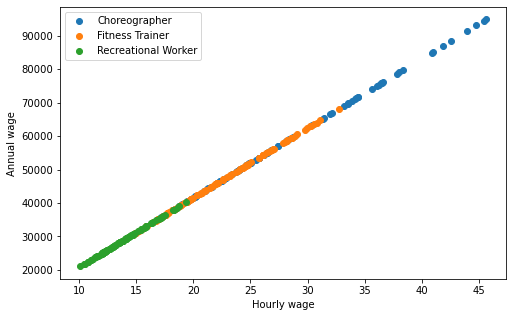

In [7]:
plt.rcParams["figure.figsize"] = [8, 5]

# Plot Choreographer hourly wage vs annual wage
temp = df[df.occ=='choreo']
plt.scatter(temp.h_mean, temp.a_mean,label='Choreographer')

# Plot Fitness Trainer hourly wage vs annual wage
temp = df[df.occ=='fit_trainer']
plt.scatter(temp.h_mean, temp.a_mean,label='Fitness Trainer')

# Plot Recreational Worker hourly wage vs annual wage
temp = df[df.occ=='rec_worker']
plt.scatter(temp.h_mean, temp.a_mean,label='Recreational Worker')

plt.ylabel('Annual wage')
plt.xlabel('Hourly wage')
plt.legend()

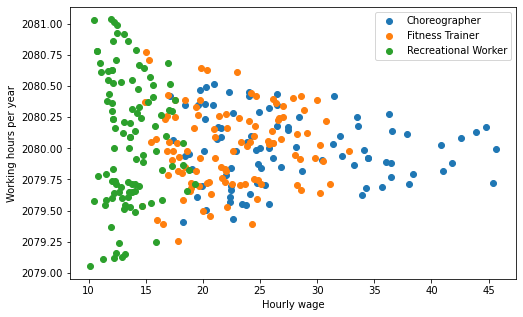

In [8]:
plt.rcParams["figure.figsize"] = [8, 5]

# Plot Choreographer hourly wage vs annual wage
temp = df[df.occ=='choreo']
plt.scatter(temp.h_mean, temp.a_mean/temp.h_mean,label='Choreographer')

# Plot Fitness Trainer hourly wage vs annual wage
temp = df[df.occ=='fit_trainer']
plt.scatter(temp.h_mean, temp.a_mean/temp.h_mean,label='Fitness Trainer')

# Plot Recreational Worker hourly wage vs annual wage
temp = df[df.occ=='rec_worker']
plt.scatter(temp.h_mean, temp.a_mean/temp.h_mean,label='Recreational Worker')

plt.ylabel('Working hours per year')
plt.xlabel('Hourly wage')
plt.legend()

From the above,
- Once annual wage is provided, their annual wage and hourly wage is highly correlated. [annual wage]/[hourly wage] values are all 2080=52(weeks)x40(hours) within an hour.
- Choreographer's income is the highest, followed by fitness worker, and then recreational worker.

## Impute dancer's annual wage
Only to adjust scale for later comparison, I'll impute dancer's annual wage (this value won't be used as a modeling parameter). I'll assume they work 2080 hours like all the other jobs here.

In [9]:
df.loc[df.occ=='dancer','a_mean'] = df.loc[df.occ=='dancer','h_mean']*2080

# Population, Consumer Price Index (CPI), and Cost Of Living Index (COLI) trend
Before we talk about the revenue and employee statistics, let's check the money and population trend first.

## Population over years

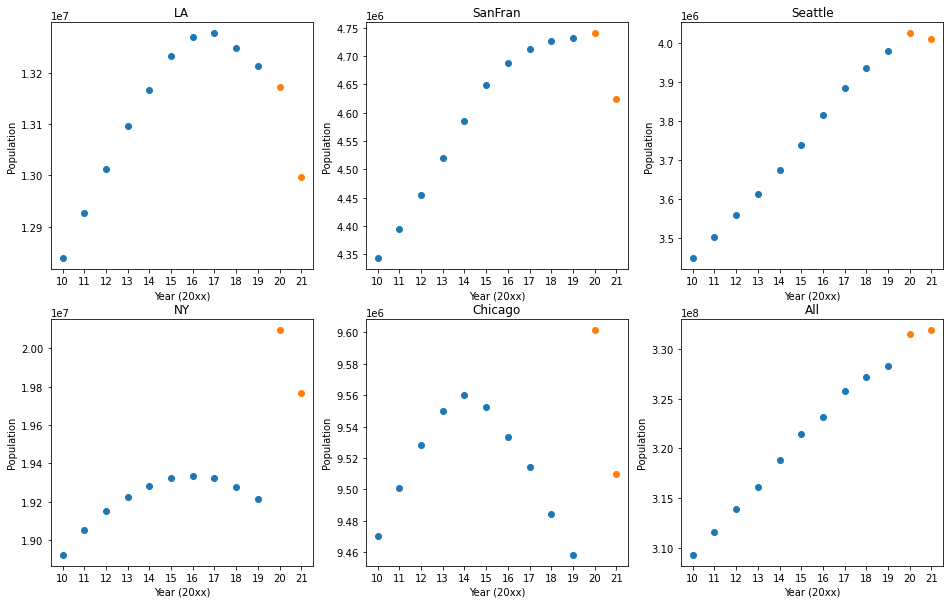

In [10]:
# Plot population
plt.rcParams["figure.figsize"] = [16, 10]
fig, ax_arr = plt.subplots(2,3)#,constrained_layout=True)

for i in range(len(area_all)):
    
    ax = ax_arr[i//3][i%3]
    
    # 2010 census and and post estimate
    t = df[(df.occ=='all_jobs')&(df.area==area_all[i])&(df.year>=2010)&(df.year<2020)]

    x = t.year-2000
    y = t.population

    ax.scatter(x, y)
    
    # 2020 census and and post estimate
    t = df[(df.occ=='all_jobs')&(df.area==area_all[i])&(df.year>=2020)]

    x = t.year-2000
    y = t.population
    
    ax.scatter(x, y)
    
    # cosmetics
    ax.set_title(area_all[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('Population')
    _ = ax.set_xticks(np.arange(10,22, 1.0))

- Note that blue data points are 2010 census and and post estimate, and orange data points are 2020 census and and post estimate.
- Overall, kept growing, then since 2014-2017, LA, NY, and Chicago are losing population, and since 2020 for San Francisco's.

## CPI

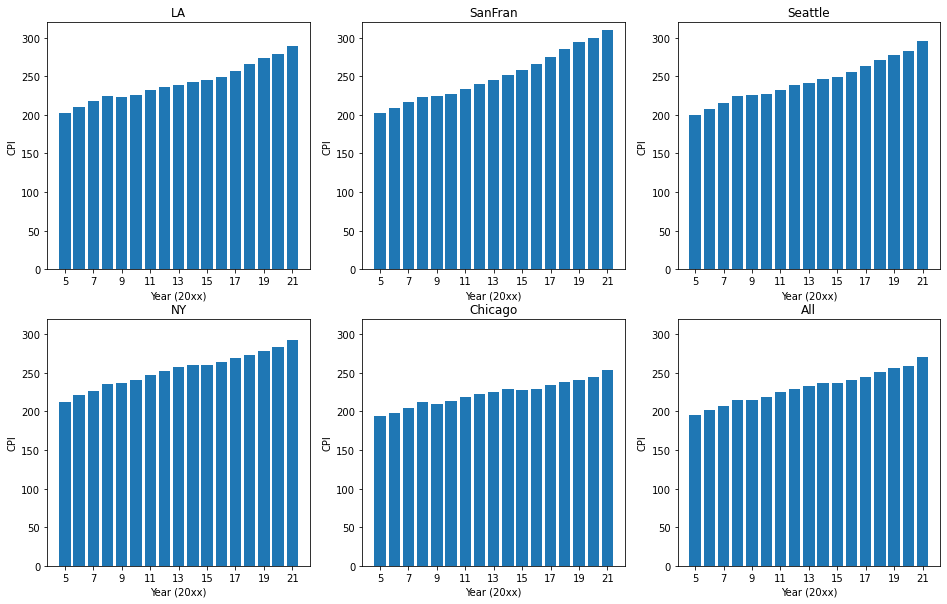

In [11]:
# Plot CPI
plt.rcParams["figure.figsize"] = [16, 10]
fig, ax_arr = plt.subplots(2,3)#,constrained_layout=True)


for i in range(len(area_all)):
    
    ax = ax_arr[i//3][i%3]
    
    t = df[(df.occ=='all_jobs')&(df.area==area_all[i])&(df.year>=2005)]

    x = t.year-2000
    y = t.cpi

    ax.bar(x, y)
    ax.set_ylim(0,320)
    ax.set_title(area_all[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('CPI')
    _ = ax.set_xticks(np.arange(5,22, 2))

- San Francisco's CPI growth is the steepest whereas Chicago's CPI growth is the slowest.
- Selected area's CPI has increased by nearly 50% from 2005 to 2021, except Chicago's CPI has increaed by about 25%.

## COLI (2010 data)

Text(0, 0.5, 'COLI/CPI')

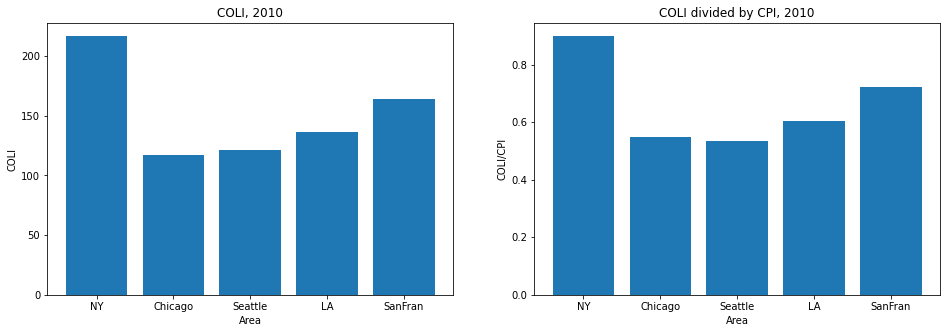

In [12]:
# Plot COLI

t = df[(df.occ=='all_jobs')&(df.area!='All')&(df.year==2010)][['area','coli','cpi']]

plt.rcParams["figure.figsize"] = [16, 5]

fig, ax_arr = plt.subplots(1,2)

# Cost of living index
ax = ax_arr[0]

ax.bar(t.area, t.coli)

ax.set_title('COLI, 2010')
ax.set_xlabel('Area')
ax.set_ylabel('COLI') 

# Cost of living/CPI
ax = ax_arr[1]

ax.bar(t.area, t.coli/t.cpi)

ax.set_title('COLI divided by CPI, 2010')
ax.set_xlabel('Area')
ax.set_ylabel('COLI/CPI') 

New York is the most expensive, then San Francisco > LA > Seattle > Chicago (Chicago > Seattle if divided by CPI).

# Number of employee

In [13]:
# Convert percent error to absolute error
df['emp_err']=df.tot_emp*df.emp_prse/100

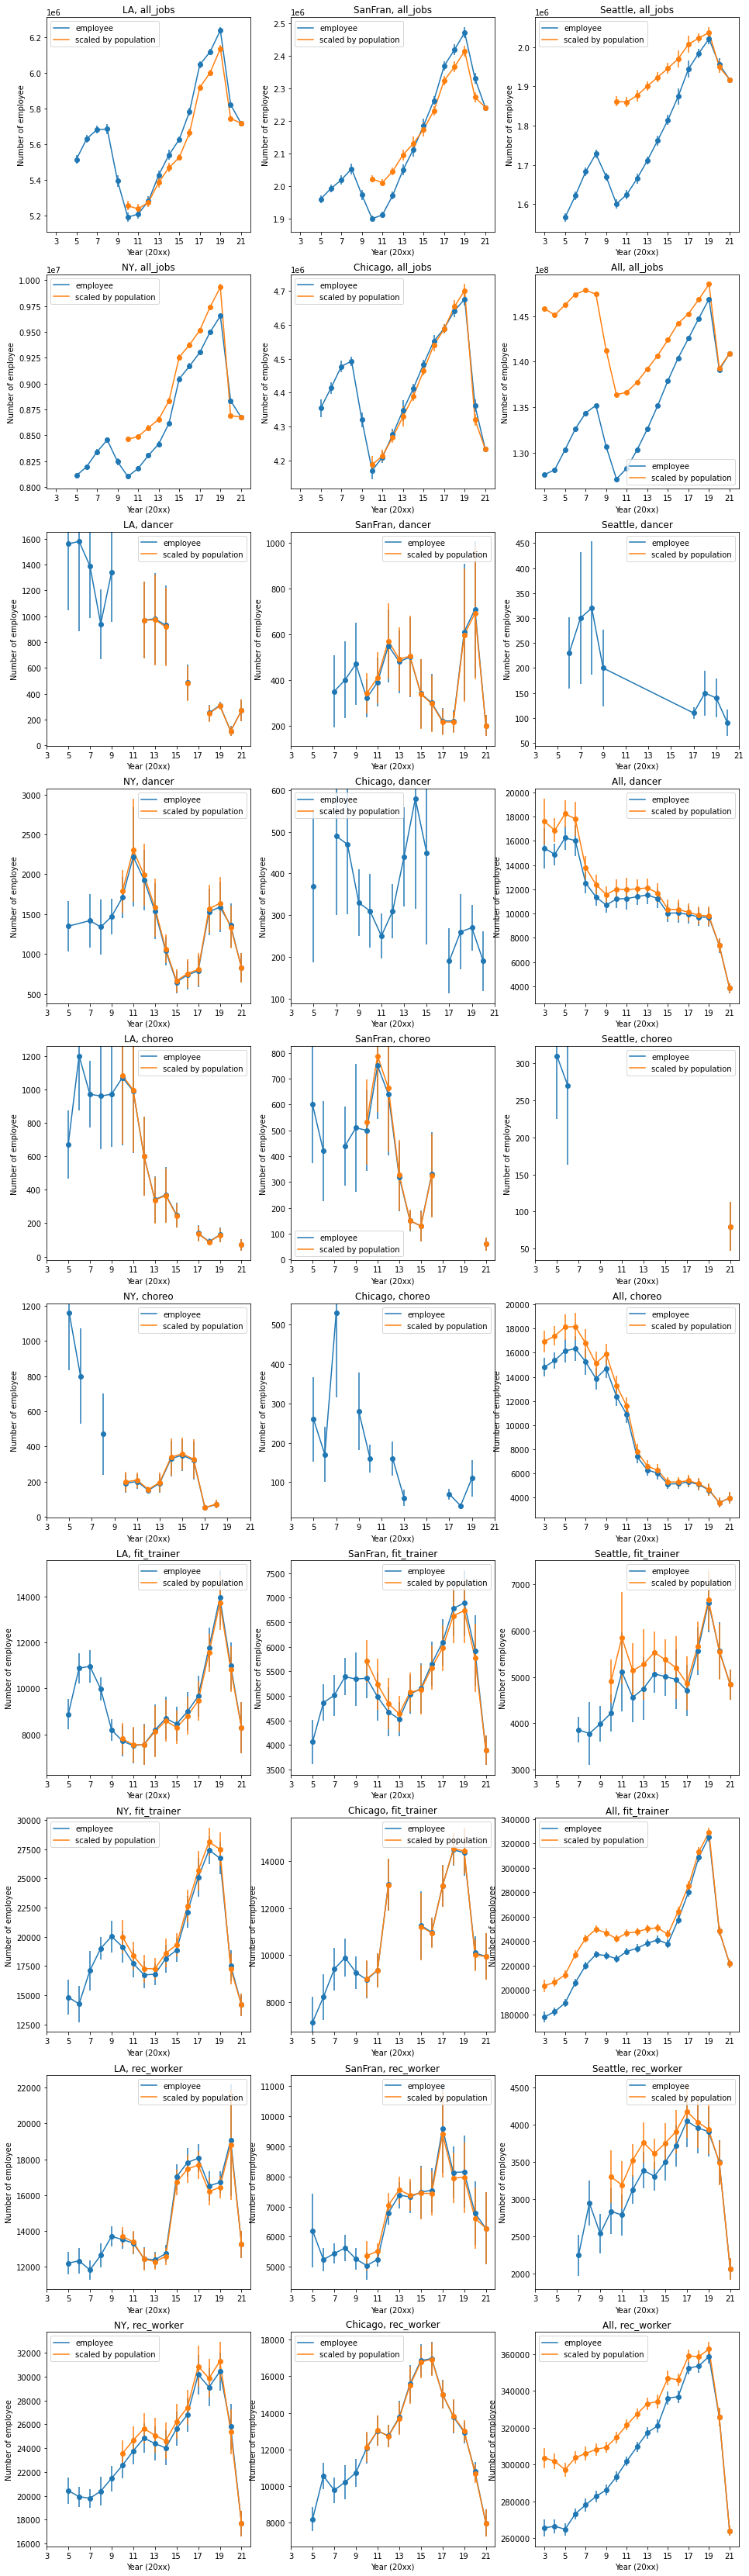

In [14]:
#%%script false --no-raise-error

# Number of employee
plt.rcParams["figure.figsize"] = [16, 60]

fig, ax_arr = plt.subplots(10,3)

ijob=0
for job in df.occ.unique():  
    
    for i in range(len(area_all)):  
                
        ax = ax_arr[ijob*2+i//3,i%3]
    
        temp = df[(df.area==area_all[i])&(df.occ==job)&(df.year>2002)]
    
        x = temp.year-2000
        y = temp.tot_emp 
        yerr = temp.emp_err 
    
        ax.plot(x, y, color='tab:blue', label='employee')
        ax.errorbar(x, y, yerr, fmt ='o', color='tab:blue')
        
        # per population, scale adjust value
        adj = temp[temp.year==2021].population.squeeze()
        
        y = temp.tot_emp/temp.population*adj
        yerr = temp.emp_err/temp.population*adj
    
        ax.plot(x, y, color='tab:orange', label='scaled by population')
        ax.errorbar(x, y, yerr, fmt ='o', color='tab:orange')
        

        ax.set_title(area_all[i]+', '+job)
        ax.set_xlabel('Year (20xx)')
        ax.set_ylabel('Number of employee')
        ax.legend()
        ax.set_xticks(np.arange(3,22, 2))

    ijob+=1

Here, we observe
- Statistics of dancers are poor, with large uncertainties and missing data.
- On the other hand, fitness instructors data are much reliable.
- Overall, dancer population are decreasing whereas fitness population are growing, then sudden drop since 2020, from Covid19. Scaling with resident population follows the same trends.

# Wage data

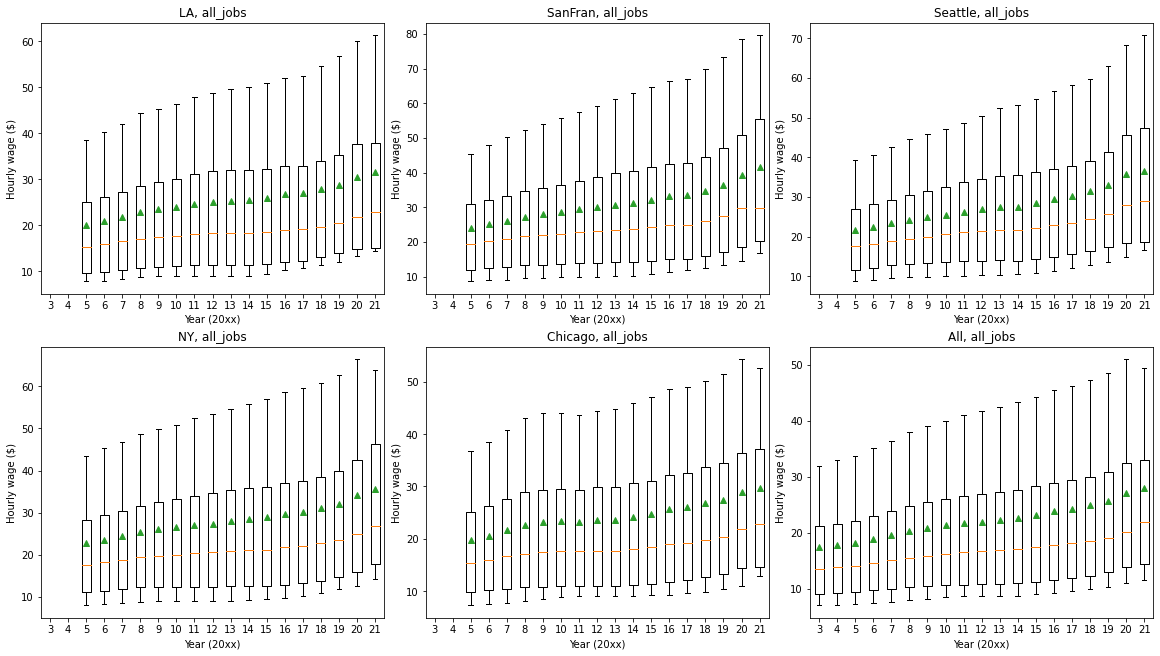

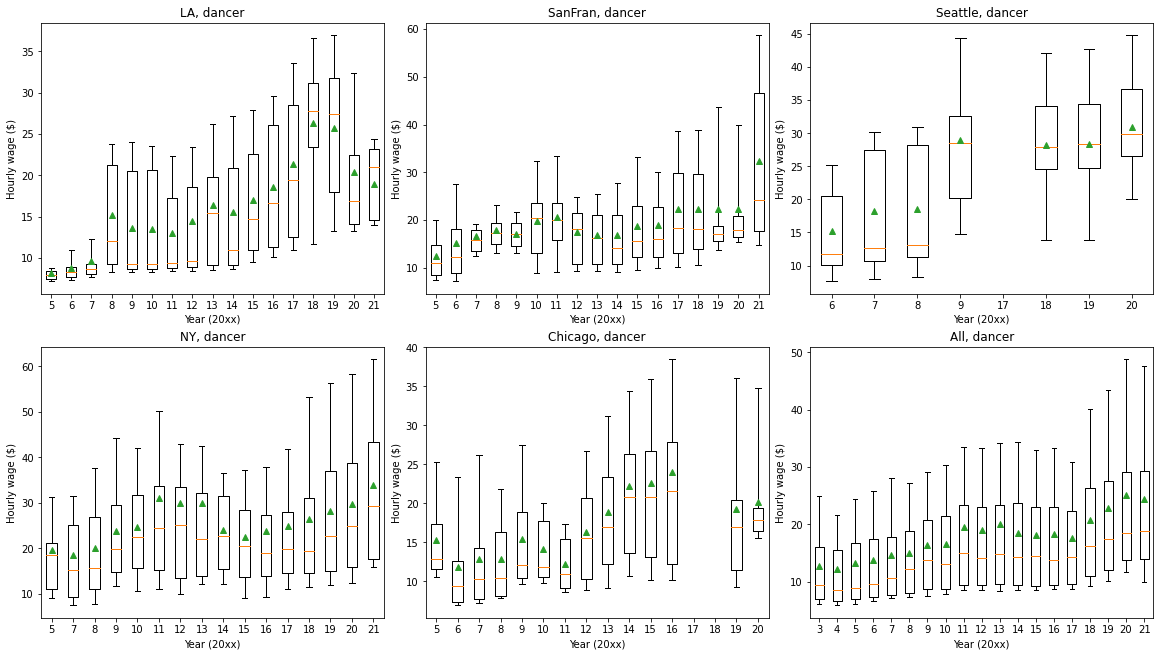

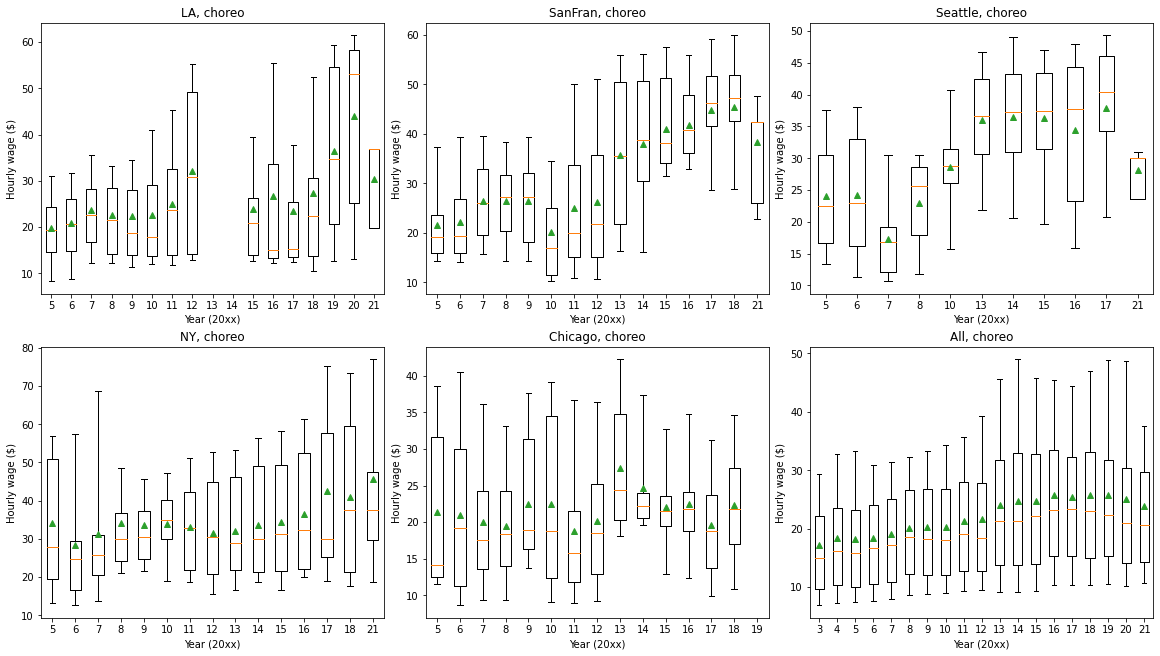

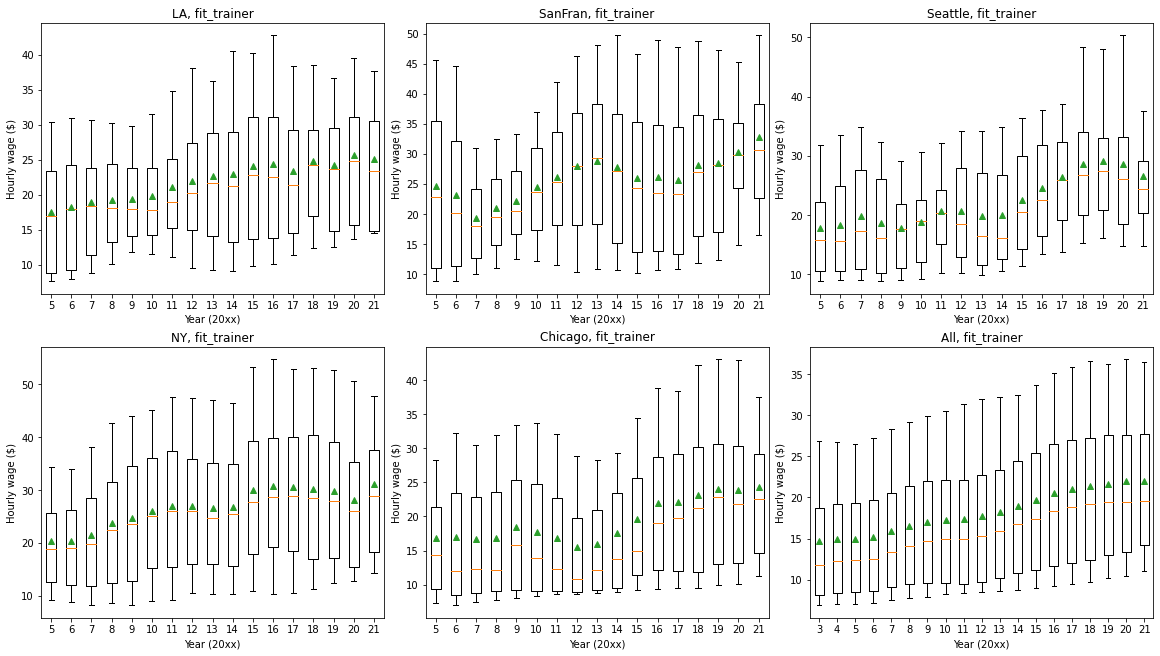

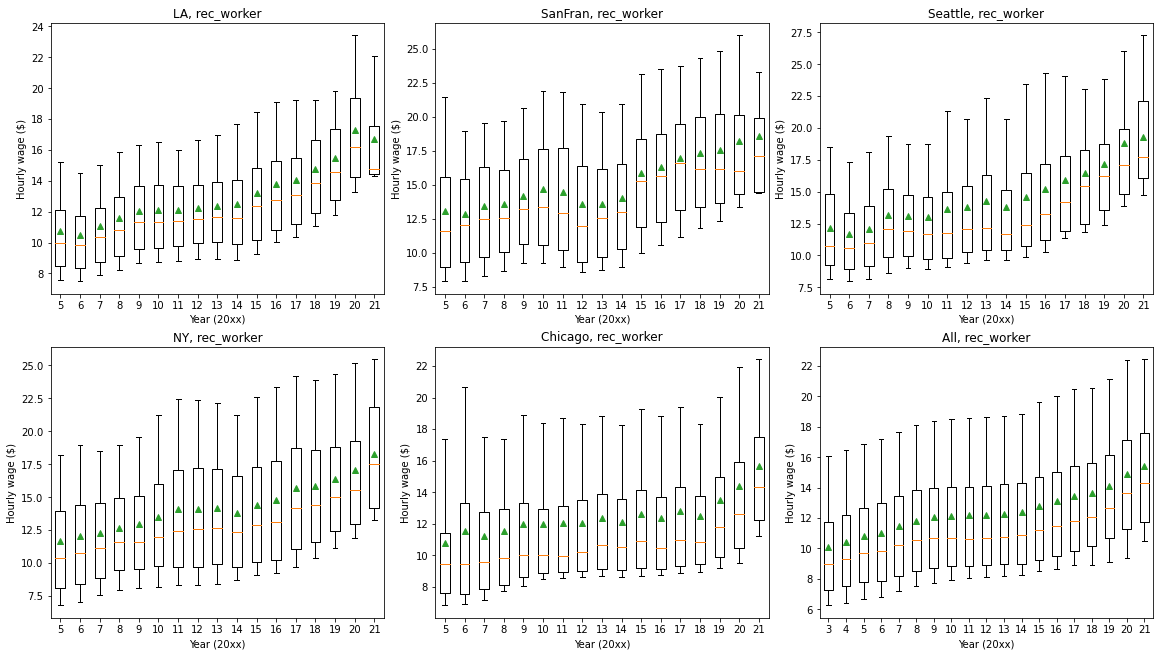

In [15]:
#%script false --no-raise-error

# Plot hourly wage, raw data
    
plt.rcParams["figure.figsize"] = [16, 9]
for job in df.occ.unique():

    _, ax = plt.subplots(2,3, constrained_layout = True);
    
    for i in range(len(area_all)):  
            
        stats=[]
        
        for year in range(2003,2022):#sorted(df.year.unique()):
            row = df[(df.year==year)&(df.area==area_all[i])&(df.occ==job)]

            if row.occ.count()!=1:
                #print("not one entry:", area, year, row.occ.count())
                pass
            else:
                mean = row.h_mean.squeeze()
                med  = row.h_median.squeeze()
                q1 = row.h_pct25.squeeze()
                q3 = row.h_pct75.squeeze()
                
                # We don't have raw data entries, so let's plot top/low 10% values instead
                whislo = row.h_pct10.squeeze()
                whishi = row.h_pct90.squeeze() 
                
                label = row.year.squeeze()-2000   
                
                #print(job,area_all[i],year,mean,label)

                stats.append({'mean':mean, 'med':med , 'q1':q1 , 'q3':q3 , 
                             'whislo':whislo , 'whishi':whishi , 'label': label}) 
                
        #print(x,iplot//3,iplot%3)
        ax[i//3,i%3].bxp(stats, showfliers=False, showmeans=True)
        ax[i//3,i%3].set_title(area_all[i]+', '+job)
        ax[i//3,i%3].set_xlabel('Year (20xx)')
        ax[i//3,i%3].set_ylabel('Hourly wage ($)')


- This is hourly wage data. Those plots are box plot, per area and job. The orange lines are medians and green triangles are means.
- Most of distributions are right skewed considering that mean is shifted to the higher quartiles.
- Fitness instructor wage in LA, San Francisco, and NY seems nearly symmetric.

Let's talk about trend after adjusting with CPI and COLI.

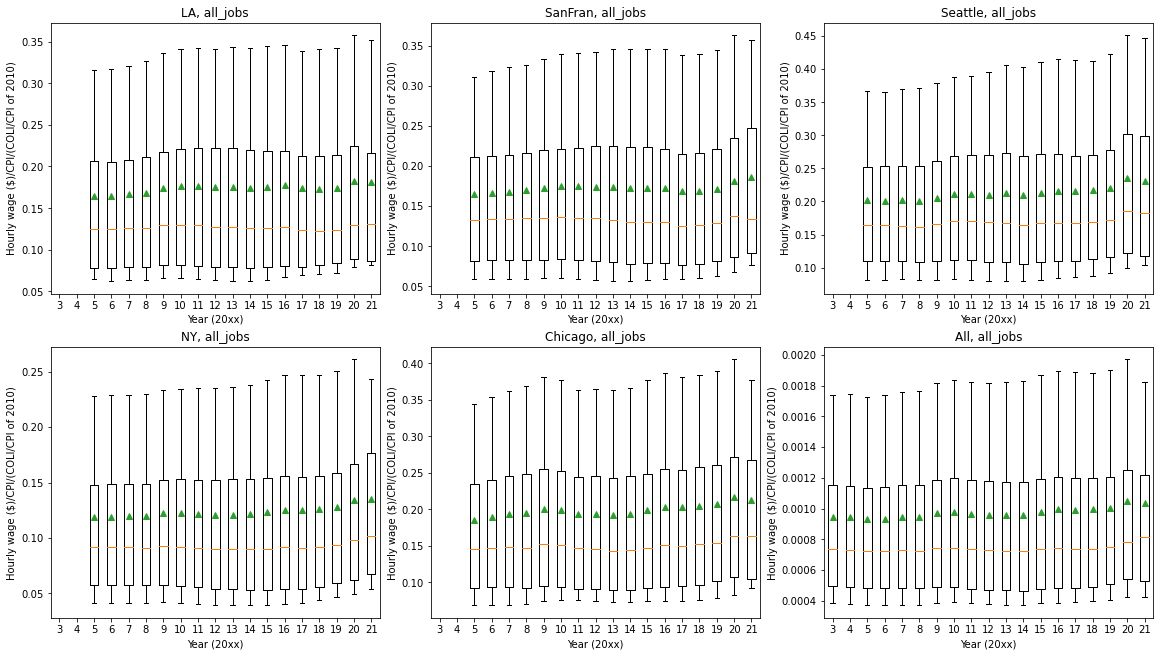

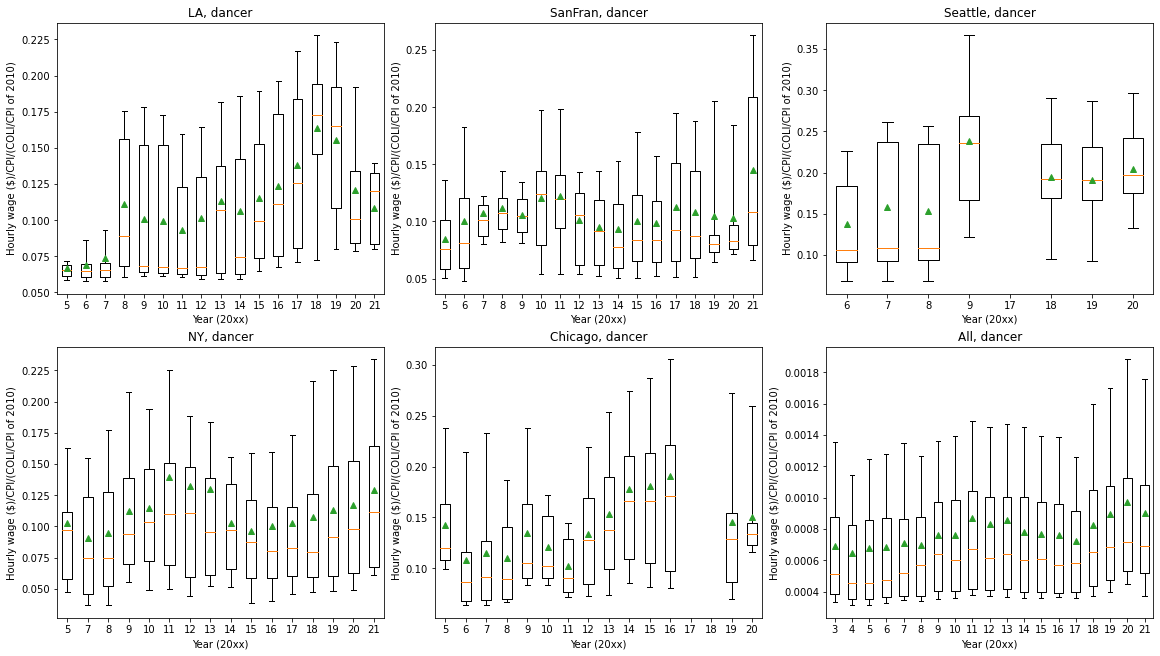

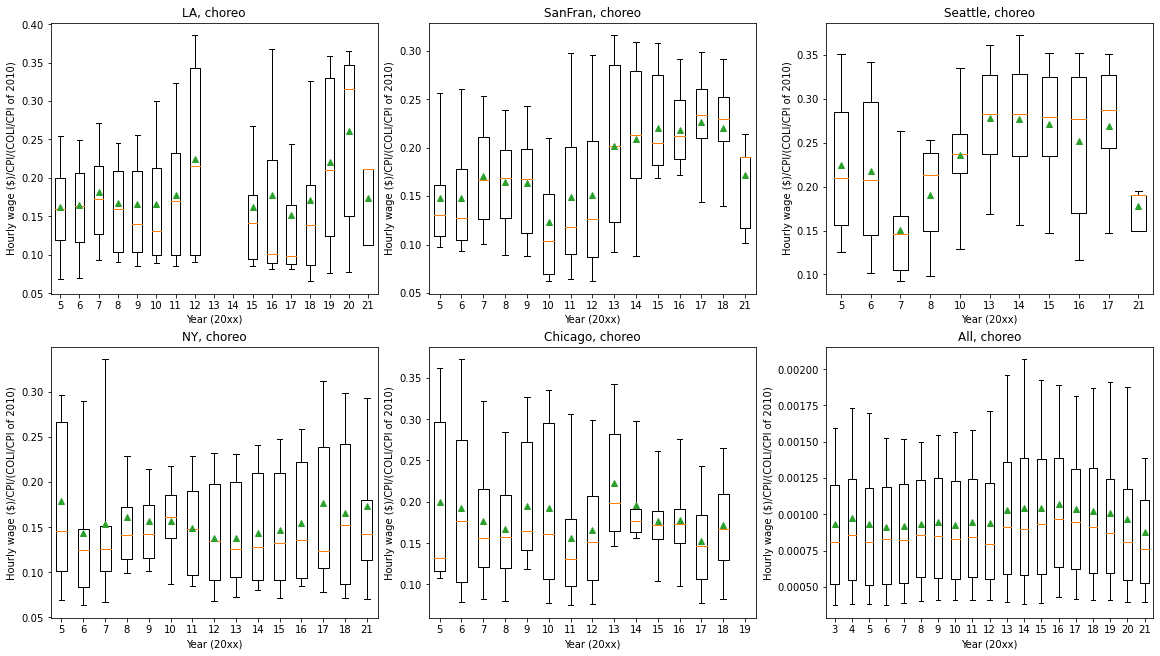

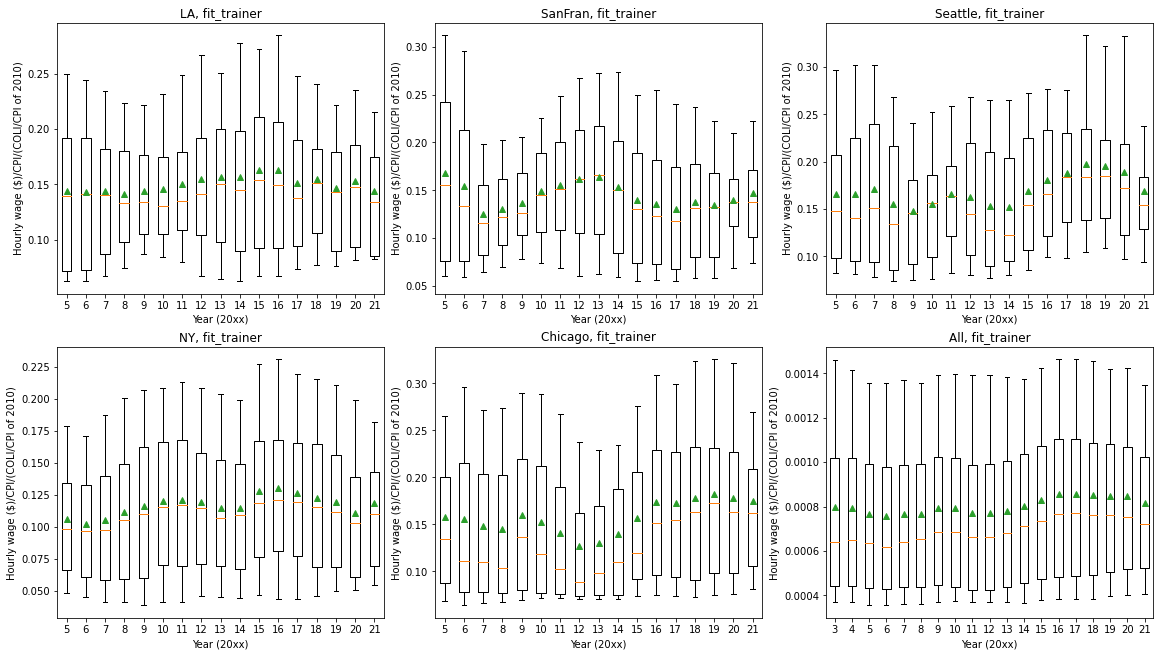

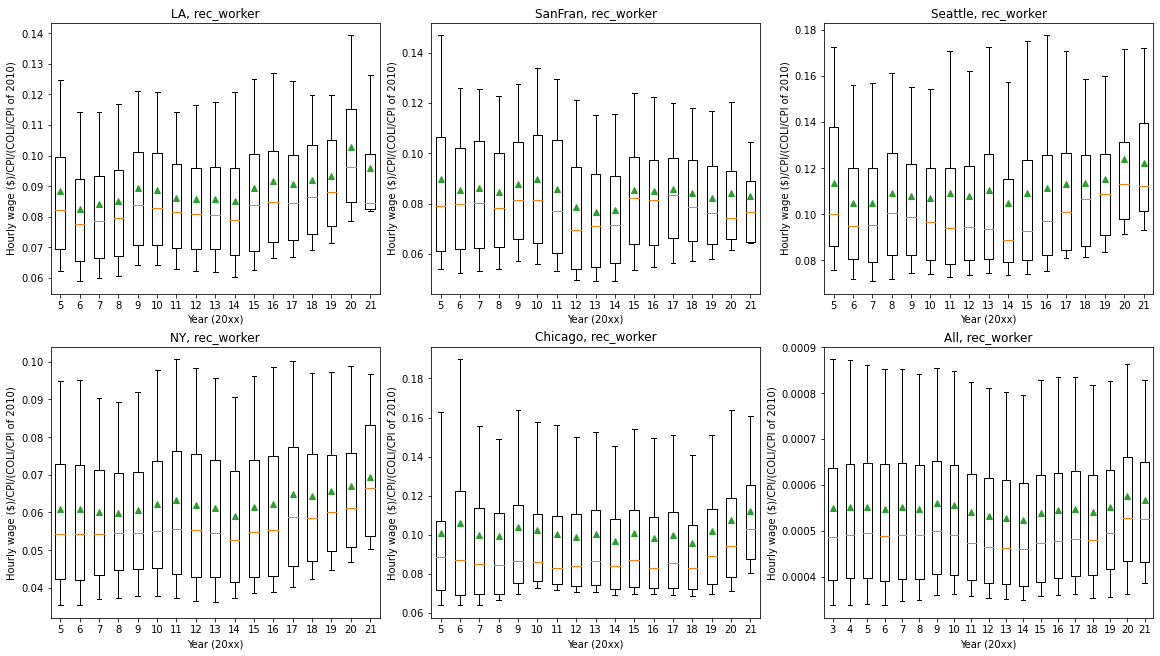

In [16]:
#%%script false --no-raise-error

# Plot hourly wage, raw data
    
plt.rcParams["figure.figsize"] = [16, 9]
for job in df.occ.unique():

    _, ax = plt.subplots(2,3, constrained_layout = True);
    
    for i in range(len(area_all)):  
            
        stats=[]
        
        for year in range(2003,2022):#sorted(df.year.unique()):
            row = df[(df.year==year)&(df.area==area_all[i])&(df.occ==job)]

            if row.occ.count()!=1:
                #print("not one entry:", area, year, row.occ.count())
                pass
            else:
                
                cpi = row.cpi.squeeze()
                coli_cpi = row.coli_cpi.squeeze()
                
                adj = coli_cpi*cpi
                
                if area_all[i]=='All':
                    adj=cpi*100
                
                mean = row.h_mean.squeeze()/adj
                med  = row.h_median.squeeze()/adj
                q1 = row.h_pct25.squeeze()/adj
                q3 = row.h_pct75.squeeze()/adj
                
                
                # We don't have raw data entries, so let's plot top/low 10% values instead
                whislo = row.h_pct10.squeeze()/adj
                whishi = row.h_pct90.squeeze()/adj 
                
                label = row.year.squeeze()-2000   
                
                #print(job,area_all[i],year,mean,label)

                stats.append({'mean':mean, 'med':med , 'q1':q1 , 'q3':q3 , 
                             'whislo':whislo , 'whishi':whishi , 'label': label}) 
                
        #print(x,iplot//3,iplot%3)
        ax[i//3,i%3].bxp(stats, showfliers=False, showmeans=True)
        ax[i//3,i%3].set_title(area_all[i]+', '+job)
        ax[i//3,i%3].set_xlabel('Year (20xx)')
        ax[i//3,i%3].set_ylabel('Hourly wage ($)/CPI/(COLI/CPI of 2010)')


- This plot is hourly statistics, divided by local CPI in order to correct yearly growth due to inflation (fare comparison between years), then divided by local COLI/CPI of 2010, for fare comparison between area.
- Overall, **Seattle has the best and NY has the worst wage**. However, the COLI is from 2010 data. Recent rapid growth of cost of living at Seattle is not considered.
- The all occupation average wage is flat. Indeed it is true that everything has arised except salary!
- No monotonic trend in either dancer or fitness business wages.

# Comebine statistics with error propagation
We will check the nationwide and local fitness employee data.
Since the **fitness revenue data** describes the **"Fitness and Recreational Sports Centers" industry**,
I'll check both **fitness trainer** and **recreational worker** statistics, as well as **combined** statistics.
From the naive guess, the **combined statistics should represent the fitness revenue best**.
First, let's combine their statistics with error propagation, then compare those three data the fitness revenue.

### Error propagation formula


The background theory about error propagation technique is explained in my blog. 
[Link to my blog post](https://minjung-mj-kim.github.io/stat-num/errorpropa/). 



To sum the number of employee $x$ and $y$,

$$sum = x+y$$

$$sum~error = \sqrt{\sigma_x^2+\sigma_y^2}$$


To take the average of wage $x$ and $y$,

$$weighted~mean = \frac{n_xx+n_yy}{n_x+n_y}$$

$$weighted~mean~error = see~the~code~below~(too~long) $$ 

Here, $\sigma$ is the standard error, provided by dataset, and $n$ is the number of employee.

### Entries to combine
- Combine number of employee, hourly wage, and annual wage
- fitness_biz = fitness trainers + recreational workers
- dance_biz = dancers + choreographers

In [17]:
# Error propagation functions
def ep_sum(x,y):
    
    return x+y

def ep_sum_err(x,y,ex,ey):
    
    return (ex**2 + ey**2)**0.5

def ep_mean(x,y,a,b):
    
    return (a*x + b*y)/(a+b)

def ep_mean_err(x,y,a,b,ex,ey,ea,eb):
    
    dfx = a/(a+b)
    dfy = b/(a+b)
    
    dfa = b*(x-y)/(a+b)**2
    dfb = a*(y-x)/(a+b)**2
    
    vx = (dfx*ex)**2
    vy = (dfy*ey)**2
    va = (dfa*ea)**2
    vb = (dfb*eb)**2
        
    return (vx+vy+va+vb)**0.5

In [18]:
# Convert percent error to absolute error
df['emp_err']=df.tot_emp*df.emp_prse/100
df['h_mean_err'] = df.h_mean*df.emp_prse/100
df['a_mean_err'] = df.a_mean*df.emp_prse/100

# Combine statistics
for area in df.area.unique():
    
    for year in df.year.unique():
        
        for occ in (('dance_biz','dancer','choreo'),('fitness_biz','fit_trainer','rec_worker')):
                
            d1 = df[(df.area==area)&(df.year==year)&(df.occ==occ[1])].copy()
            d2 = df[(df.area==area)&(df.year==year)&(df.occ==occ[2])].copy()
            
            if d1.empty or d2.empty:
                df = df.append({'area':area,'year':year,'occ':occ[0]},ignore_index=True)

             
            elif   (d1.tot_emp.empty    | d2.tot_emp.empty | 
                    d1.emp_err.empty    | d2.emp_err.empty | 
                    d1.h_mean.empty     | d2.h_mean.empty |
                    d1.a_mean.empty     | d2.a_mean.empty |
                    d1.h_mean_err.empty | d2.h_mean_err.empty |
                    d1.a_mean_err.empty | d2.a_mean_err.empty):
                    
                    df = df.append({'area':area,'year':year,'occ':occ[0]},ignore_index=True)            
            else:
                                
                tot_emp = ep_sum(d1.tot_emp.squeeze(), d2.tot_emp.squeeze())
                
                emp_err = ep_sum_err(d1.tot_emp.squeeze(), d2.tot_emp.squeeze(),
                                     d1.emp_err.squeeze(), d2.emp_err.squeeze())

                h_mean = ep_mean(d1.h_mean.squeeze(), d2.h_mean.squeeze(),
                                 d1.tot_emp.squeeze(), d2.tot_emp.squeeze())
                
                h_mean_err = ep_mean_err(d1.h_mean.squeeze(), d2.h_mean.squeeze(),
                                         d1.tot_emp.squeeze(), d2.tot_emp.squeeze(),
                                         d1.h_mean_err.squeeze(), d2.h_mean_err.squeeze(),
                                         d1.emp_err.squeeze(), d2.emp_err.squeeze())

                a_mean = ep_mean(d1.a_mean.squeeze(), d2.a_mean.squeeze(),
                                 d1.tot_emp.squeeze(), d2.tot_emp.squeeze())

                a_mean_err = ep_mean_err(d1.a_mean.squeeze(), d2.a_mean.squeeze(),
                                         d1.tot_emp.squeeze(), d2.tot_emp.squeeze(),
                                         d1.a_mean_err.squeeze(), d2.a_mean_err.squeeze(),
                                         d1.emp_err.squeeze(), d2.emp_err.squeeze())               

                d1.occ = occ[0]
                d1.tot_emp = tot_emp
                d1.emp_err = emp_err
                d1.h_mean = h_mean
                d1.h_mean_err = h_mean_err
                d1.a_mean = a_mean
                d1.a_mean_err = a_mean_err
                                
                df = df.append(d1, ignore_index=True)

In [19]:
# Check if values are correctly calculated
df[(df.area=='NY')&(df.year==2015)][['occ','tot_emp','emp_err','a_mean','a_mean_err','h_mean','h_mean_err']]

,occ,tot_emp,emp_err,a_mean,a_mean_err,h_mean,h_mean_err
388,all_jobs,9046910.0,27140.730000,59990.000000,179.970000,28.840000,0.086520
389,dancer,650.0,141.700000,46800.000000,10202.400000,22.500000,4.905000
390,choreo,350.0,89.950000,71570.000000,18393.490000,34.410000,8.843370
391,fit_trainer,18870.0,981.240000,62370.000000,3243.240000,29.980000,1.558960
392,rec_worker,25640.0,1435.840000,30010.000000,1680.560000,14.430000,0.808080
636,dance_biz,1000.0,167.838889,55469.500000,9435.485105,26.668500,4.536394
637,fitness_biz,44510.0,1739.099895,43729.011458,1786.749363,21.022417,0.858908


## Total number of employee in fitness business

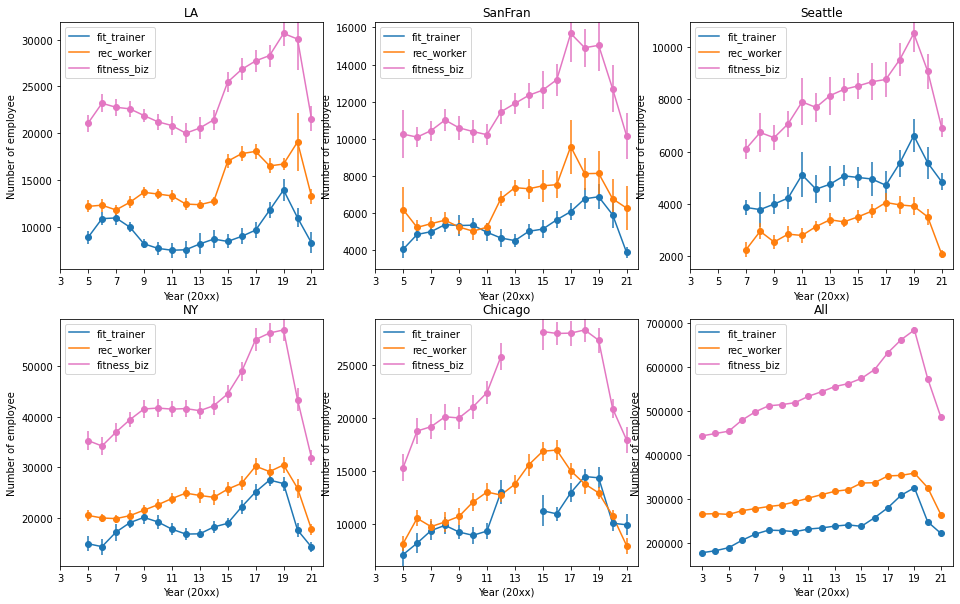

In [20]:
# Plot the number of fitness employee
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for job, color in (('fit_trainer','tab:blue'),
                   ('rec_worker','tab:orange'),
                   ('fitness_biz','tab:pink')):  
        
    for i in range(len(area_all)):  
                
        ax = ax_arr[i//3,i%3]
    
        temp = df[(df.area==area_all[i])&(df.occ==job)&(df.year>2002)]
                    
        x = temp.year-2000
        y = temp.tot_emp 
        yerr = temp.emp_err 
            
        ax.plot(x, y, color=color, label=job)
        ax.errorbar(x, y, yerr, fmt ='o', color=color)

        ax.set_title(area_all[i])
        ax.set_xlabel('Year (20xx)')
        ax.set_ylabel('Number of employee')
        ax.set_xticks(np.arange(3,22, 2))
        ax.legend()

- Fitness employee numbers were generally kept growing, then suddenly start to dropping after 2019 everywhere.
- In 2005-2012, LA's fitness employee were dropping.
- Chicago's fitness employee seems to be stagnant in 2014(or earlier)-2018.

## Total number of employee in dance business

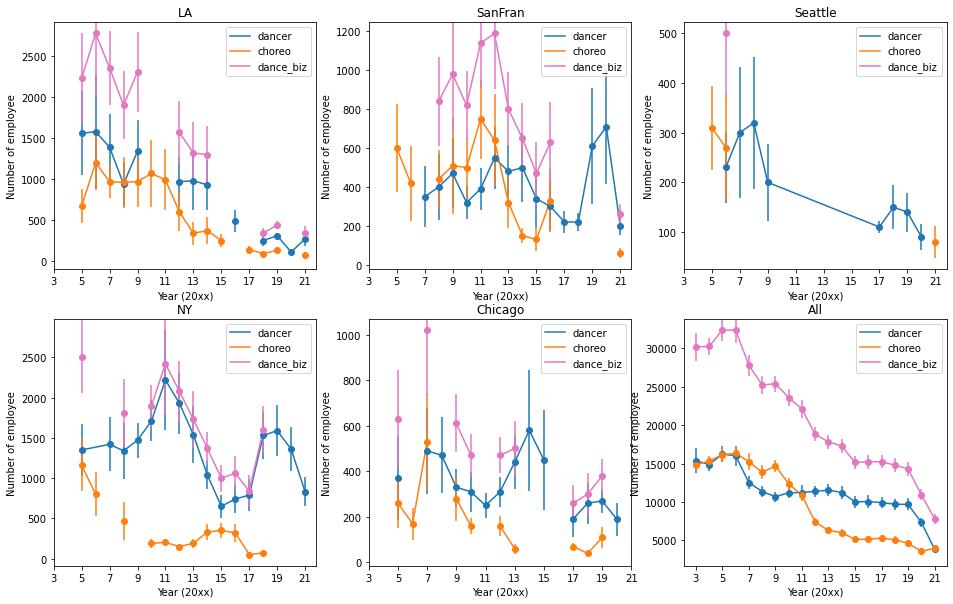

In [21]:
# Plot the number of fitness employee
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for job, color in (('dancer','tab:blue'),
                   ('choreo','tab:orange'),
                   ('dance_biz','tab:pink')):  
        
    for i in range(len(area_all)):  
                
        ax = ax_arr[i//3,i%3]
    
        temp = df[(df.area==area_all[i])&(df.occ==job)&(df.year>2002)]
                    
        x = temp.year-2000
        y = temp.tot_emp 
        yerr = temp.emp_err 
            
        ax.plot(x, y, color=color, label=job)
        ax.errorbar(x, y, yerr, fmt ='o', color=color)

        ax.set_title(area_all[i])
        ax.set_xlabel('Year (20xx)')
        ax.set_ylabel('Number of employee')
        ax.set_xticks(np.arange(3,22, 2))
        ax.legend()

- The number of all dance industry jobs are generally kept decreasing or stagnant everywhere.

## Annual wage

In [22]:
# Convert percent error to absolute error
df['h_mean_err'] = df.h_mean*df.emp_prse/100 # hourly wage
df['a_mean_err'] = df.a_mean*df.emp_prse/100 # annual salary

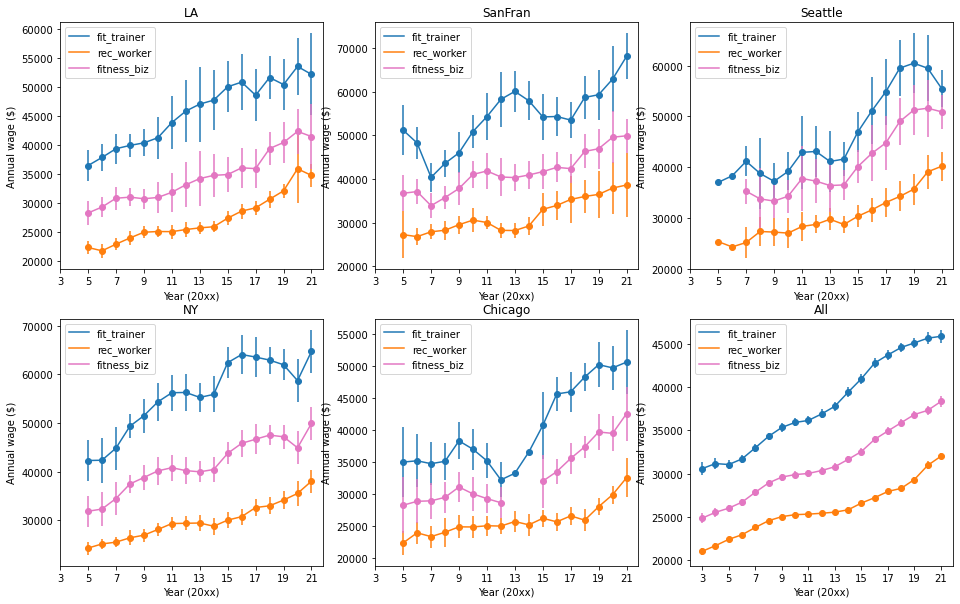

In [23]:
# Plot the average annual salary of fitness industry workers
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for job, color in (('fit_trainer','tab:blue'),
                   ('rec_worker','tab:orange'),
                   ('fitness_biz','tab:pink')):  
    
    for i in range(len(area_all)):  
                
        ax = ax_arr[i//3,i%3]
    
        temp = df[(df.area==area_all[i])&(df.occ==job)&(df.year>2002)]
    
        x = temp.year-2000
        y = temp.a_mean 
        yerr = temp.a_mean_err 
    
        ax.plot(x, y, color=color, label=job)
        ax.errorbar(x, y, yerr, fmt ='o', color=color)

        ax.set_title(area_all[i])
        ax.set_xlabel('Year (20xx)')
        ax.set_ylabel('Annual wage ($)')
        ax.set_xticks(np.arange(3,22, 2))
        ax.legend()

Recreational workers are less paid than fitness workers everywhere all time.

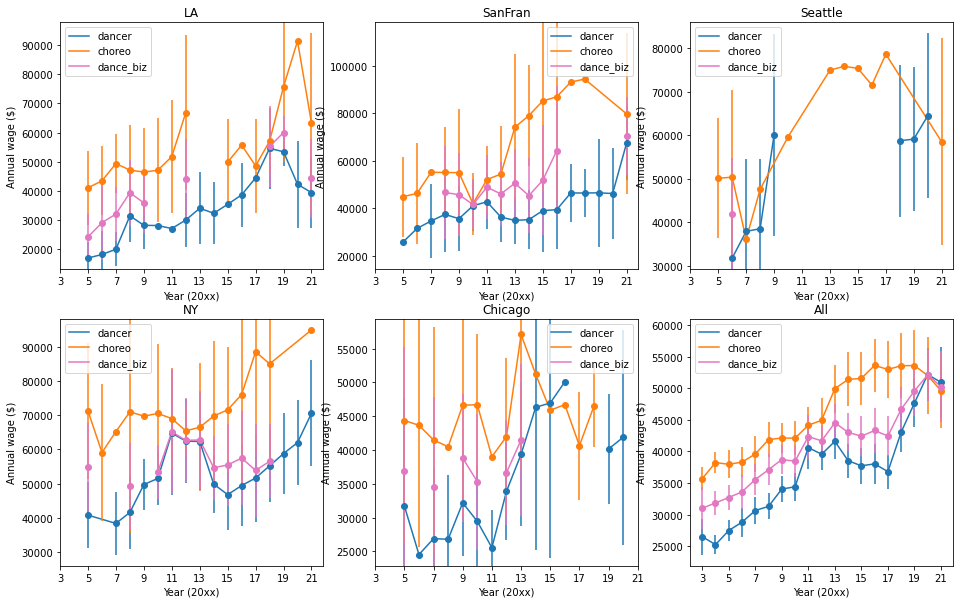

In [24]:
# Plot the average annual salary of fitness industry workers
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for job, color in (('dancer','tab:blue'),
                   ('choreo','tab:orange'),
                   ('dance_biz','tab:pink')): 
    
    for i in range(len(area_all)):  
                
        ax = ax_arr[i//3,i%3]
    
        temp = df[(df.area==area_all[i])&(df.occ==job)&(df.year>2002)]
    
        x = temp.year-2000
        y = temp.a_mean 
        yerr = temp.a_mean_err 
    
        ax.plot(x, y, color=color, label=job)
        ax.errorbar(x, y, yerr, fmt ='o', color=color)

        ax.set_title(area_all[i])
        ax.set_xlabel('Year (20xx)')
        ax.set_ylabel('Annual wage ($)')
        ax.set_xticks(np.arange(3,22, 2))
        ax.legend()

- Uncertainties are huge.
- Choreographers are generally paid more than dancers.
- Keep in mind that dancer's wage are hourly wage multiplied by 2080 because annual salaries are not provided.

# Calculate employment volume $V$
Let's calculate employment volume with error propagation technique.
The background theory about error propagation technique is explained in my blog. 
[Link to my blog post](https://minjung-mj-kim.github.io/stat-num/errorpropa/).

## Error propagation formula

To multiply $x$ and $y$,

$$product=xy$$

$$product~error=\sqrt{y^2\sigma_x^2+x^2\sigma_y^2}$$

In [25]:
# Define error propagation function
def ep_mul(x,y):
    
    return x*y

def ep_mul_err(x,y,ex,ey):
    
    return ((x*ey)**2+(y*ex)**2)**0.5

In [26]:
# Get volume
# Divide by 1,000,000,000 to match unit with revenue (in billion dollars)
df['vol'] = df.a_mean*df.tot_emp/1000000000
# Error propagation of volume
df['vol_err'] = df.apply(lambda x: ep_mul_err(x['a_mean'],x['tot_emp'],
                                              x['a_mean_err'],x['emp_err']), axis=1)/1000000000 

In [27]:
# Check if values are correctly calculated
df[(df.area=='NY')&(df.year==2015)][['occ','tot_emp','emp_err','a_mean','a_mean_err','h_mean','h_mean_err','vol','vol_err']]

,occ,tot_emp,emp_err,a_mean,a_mean_err,h_mean,h_mean_err,vol,vol_err
388,all_jobs,9046910.0,27140.730000,59990.000000,179.970000,28.840000,0.086520,542.724131,2.302583
389,dancer,650.0,141.700000,46800.000000,10202.400000,22.500000,4.905000,0.030420,0.009378
390,choreo,350.0,89.950000,71570.000000,18393.490000,34.410000,8.843370,0.025049,0.009104
391,fit_trainer,18870.0,981.240000,62370.000000,3243.240000,29.980000,1.558960,1.176922,0.086550
392,rec_worker,25640.0,1435.840000,30010.000000,1680.560000,14.430000,0.808080,0.769456,0.060938
636,dance_biz,1000.0,167.838889,55469.500000,12092.351000,26.668500,5.813733,0.055469,0.015261
637,fitness_biz,44510.0,1739.099895,43729.011458,2273.908596,21.022417,1.093166,1.946378,0.126599


## Trend of the fitness employment volume

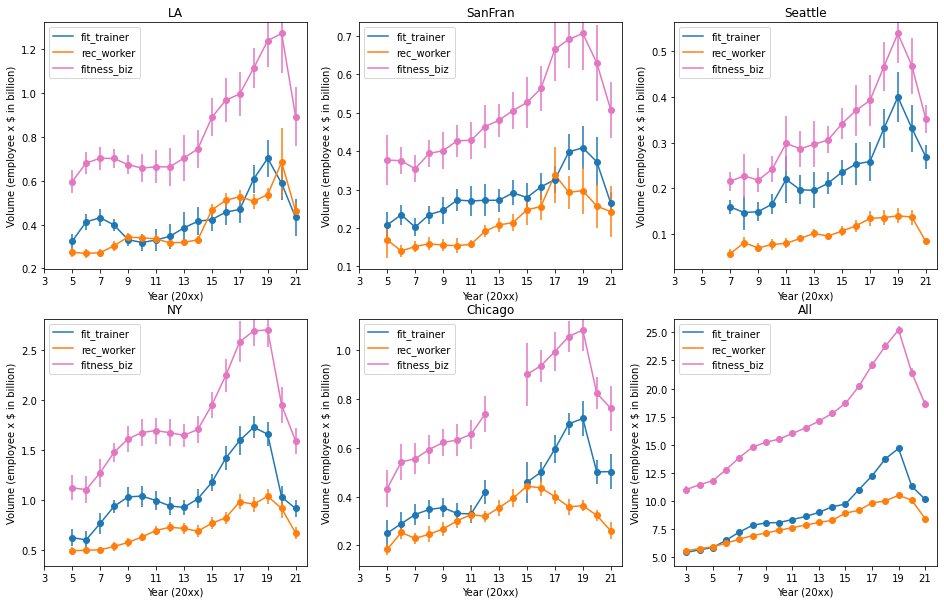

In [28]:
# Plot the average annual salary of fitness industry workers
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for job, color in (('fit_trainer','tab:blue'),
                   ('rec_worker','tab:orange'),
                   ('fitness_biz','tab:pink')):  
    
    for i in range(len(area_all)):  
                
        ax = ax_arr[i//3,i%3]
    
        temp = df[(df.area==area_all[i])&(df.occ==job)&(df.year>2002)]
    
        x = temp.year-2000
        y = temp.vol 
        yerr = temp.vol_err 
    
        ax.plot(x, y, color=color, label=job)
        ax.errorbar(x, y, yerr, fmt ='o', color=color)

        ax.set_title(area_all[i])
        ax.set_xlabel('Year (20xx)')
        ax.set_ylabel('Volume (employee x $ in billion)')
        ax.set_xticks(np.arange(3,22, 2))
        ax.legend()

Follows similar trend of employee population.

## Trend of the dance employment volume

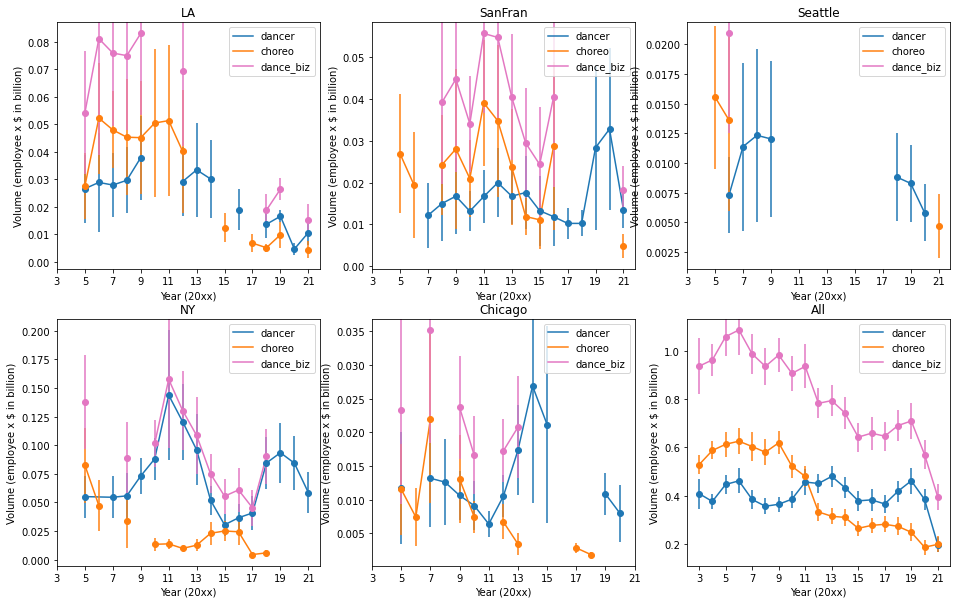

In [29]:
# Plot the average annual salary of fitness industry workers
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for job, color in (('dancer','tab:blue'),
                   ('choreo','tab:orange'),
                   ('dance_biz','tab:pink')):  
    
    for i in range(len(area_all)):  
                
        ax = ax_arr[i//3,i%3]
    
        temp = df[(df.area==area_all[i])&(df.occ==job)&(df.year>2002)]
    
        x = temp.year-2000
        y = temp.vol 
        yerr = temp.vol_err 
    
        ax.plot(x, y, color=color, label=job)
        ax.errorbar(x, y, yerr, fmt ='o', color=color)

        ax.set_title(area_all[i])
        ax.set_xlabel('Year (20xx)')
        ax.set_ylabel('Volume (employee x $ in billion)')
        ax.set_xticks(np.arange(3,22, 2))
        ax.legend()

Generrally decreasing, like dance industry employee population.

# Save updated dataset

In [30]:
df.to_csv('data/dance2.csv',index=False)